# Exploratory Data Analysis

## Importing Libraries and Dataset

In [1]:
# Static image generation
# $ conda install -c conda-forge python-kaleido
!pip install -U kaleido &> /dev/null

In [2]:
# Importing libraries
# Numpy for array operations and also to do calculations
import numpy as np
# Pandas for load dataset and manipulation of tabular data
import pandas as pd
# For plotting 
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline

#from matplotlib import rcParams
#import matplotlib.gridspec as gridspec
#from IPython.core.pylabtools import figsize
#from datasist.structdata import detect_outliers

# For importing dataset from url
import urllib.request
# To interact with the underlying Operating System
import os
# For numerical computation and ML modeling phase 
import tensorflow as tf
# to manipulate date and time
from datetime import datetime, timedelta
# Generate words cloud
from wordcloud import WordCloud
# import Images to notebook
from IPython.display import Image

In [3]:
# Set warnings to be ignored
import warnings
#warnings.filterwarnings("ignore")

In [4]:
# Export plotly graphs to image
if not os.path.exists("images"):
    os.mkdir("images")

In [5]:
# Maximzing view
#pd.set_option("display.max_rows", None)

In [6]:
# Download dataset from repo raw file link is a must to be able to load the file
# &> /dev/null
!wget https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/Data_Train.xlsx

--2023-06-06 18:45:18--  https://raw.githubusercontent.com/RamyGendy/Airline-Flight-Price-Prediction/main/Data_Train.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 634522 (620K) [application/octet-stream]
Saving to: ‘Data_Train.xlsx.2’

Data_Train.xlsx.2   100%[===================>] 619.65K  --.-KB/s    in 0.04s   

2023-06-06 18:45:18 (13.9 MB/s) - ‘Data_Train.xlsx.2’ saved [634522/634522]



In [7]:
# Installing `openpyxl` may be required to access dataset # !pip install openpyxl
# Read dataset from xlsx file, engine='openpyxl' 
df = pd.read_excel('Data_Train.xlsx', engine='openpyxl')

In [8]:
# Explore first 5 observations
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Data Understanding:**

1. `Airline`: Name of the airline used for traveling.
2. `Date_of_Journey`: Date at which a person traveled.
3. `Source`: Starting location of flight.
4. `Destination`: Ending location of flight.
5. `Route`: This contains information on starting and ending location of the journey in the standard format used by airlines.
6. `Dep_Time`: Departure time of flight from starting location.
7. `Arrival_Time`: Arrival time of flight at destination.
8. `Duration`: Duration of flight in hours/minutes.
9. `Total_Stops`: Number of total stops flight took before landing at the destination.
10. `Additional_Info`: Show any additional information about a flight.
11. `Price`: Price of the flight

## Date Exploration

In [9]:
# Dataframe shape
df.shape

(10683, 11)

In [10]:
# Information Summery
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
# Statistical Description
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
# View dataframe columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

## Data Preprocessing


**Content:**

1. Data Cleaning.
2. Anomally Detection.
2. Data Integration.

#### Missing Values:

In [13]:
# Check missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
# View observations with missing values
df[df.isnull().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [15]:
# Drop the null values
df.dropna(inplace=True)

#### Duplicates:

In [16]:
# Check for duplicated values
df.duplicated().sum()

220

In [17]:
# Check if duplicated values
duplicated_df=df[df.duplicated()]
duplicated_df.shape

(220, 11)

In [18]:
# Sort duplicated observations together
duplicates = df.duplicated()
df_sorted = df[duplicates].sort_values(by='Price')
df_sorted.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3711,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No check-in baggage included,3873
2870,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,4273
6770,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,No info,4777
9097,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,4777
5470,Vistara,24/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,5403
6881,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,07:10,10:05,2h 55m,non-stop,No info,6144
8174,Jet Airways,21/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 22 Mar,23h 40m,2 stops,In-flight meal not included,6643
10115,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,6860
7502,SpiceJet,03/03/2019,Banglore,New Delhi,BLR → DEL,20:30,23:20,2h 50m,non-stop,No info,6860
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860


In [19]:
# Display original and duplicated observations
df[duplicates]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [20]:
# Total number of duplicated values
DupToTot = round((df.duplicated().sum())*100/len(df))
print ("Duplicated values in {} is about {} % of {} total values.".format(df.duplicated().sum(),DupToTot,len(df)))
if DupToTot < 10:
  print ("Removel of duplication is accepted.")
else:
    print ("Removel of duplication is NOT accepted.")

Duplicated values in 220 is about 2 % of 10682 total values.
Removel of duplication is accepted.


In [21]:
# Remove duplicated values
df.drop_duplicates(inplace=True)

**Summary:**

* There is two missing values in features in one observation (`9039`): `Total_Stops` and `Route`.
* Wrong Datatype in `Date_of_Journey`, `Dep_Time`, `Arrival_Time` and `Duration` : expected to be presented as `Date/time` format but found as `Object`.
* Wrong Datatype in `Total_Stops` : expected to be `Integer` but found as `Object`
* `Additional_Info` seems to have a lot of not relevant information.
* `220` duplicated observations within our dataframe were removed.

#### Airline Company:

In [22]:
# 1st Feature: `Airline` unique values
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [23]:
# Count values in `Airline` feature
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

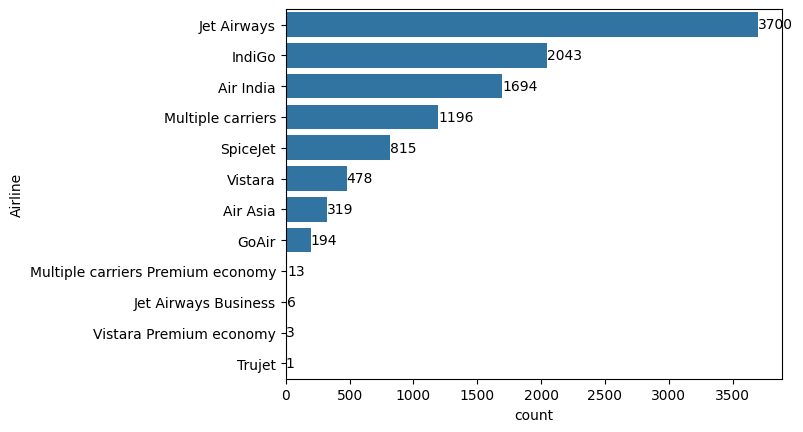

In [24]:
# Plot Airline count
ax = sns.countplot(data=df, y="Airline", color = sns.color_palette()[0], order=df['Airline'].value_counts().index)
ax.bar_label(ax.containers[0]);

**Observations:**

* `Multiple carriers` is duplicated as `Multiple carriers Premium economy`.
* `Vistara` is duplicated as `Vistara Premium economy`.
* `Jet Airways` is splited into `Jet Airways` and `Jet Airways Business`
* `Trujet` has only one entry.

In [25]:
# Investigating `Multiple carriers Premium economy` observations
df[df["Airline"]=="Multiple carriers Premium economy"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
717,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info,10161
1799,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,21:00,13h 30m,1 stop,No info,9845
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,19:15,10h 20m,1 stop,No info,10161
4718,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,21:00,15h,1 stop,No info,9845
5090,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,13:20,7h 20m,1 stop,No info,11269
5489,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,15:30,9h 30m,1 stop,No info,11269
5673,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,06:00,18:50,12h 50m,1 stop,No info,14629
5836,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,18:50,11h 20m,1 stop,No info,14629
6470,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
6591,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269


* the `Airline` feature contains `Multiple carriers Premium economy` observations which basically the same company `Multiple carriers` but with different name, therefore we will replace `Multiple carriers Premium economy` values with the company name `Multiple carriers` values and add the `Premium economy` values to `Addtional_info`.

In [26]:
# Adding `Premium economy` values to `Addtional_info`
df.loc[
    df["Airline"]=="Multiple carriers Premium economy",
     "Additional_Info"] = df.loc[
        df["Airline"]=="Multiple carriers Premium economy",
         "Additional_Info"].replace('No info', 'Premium economy')

In [27]:
# Replace `Multiple carriers Premium economy` with `Multiple carriers`
df['Airline'].replace(
    'Multiple carriers Premium economy',
     'Multiple carriers',
      inplace = True)

In [28]:
# Investigating `Jet Airways Business` observations
df[df["Airline"]=="Jet Airways Business"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
7351,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209



* the `Airline` feature contains `Jet Airways Business` observations which basically the same company `Jet Airways` but with different name, therefore we will replace `Jet Airways Business` values with the company name `Jet Airways` values and add the `Business` as `Business class` values in `Addtional_info`.

In [29]:
# Adding `Business class` values of `Jet Airways Business` to `Addtional_info`
df.loc[
    df["Airline"]=="Jet Airways Business",
     "Additional_Info"] = df.loc[
        df["Airline"]=="Jet Airways Business",
         "Additional_Info"].replace('No info', 'Business class')

In [30]:
# Replace `Jet Airways Business` with `Jet Airways`
df['Airline'].replace(
    'Jet Airways Business',
     'Jet Airways',
      inplace = True)

In [31]:
# Investigating `Vistara Premium economy` observations
df[df["Airline"]=="Vistara Premium economy"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,03/03/2019,Banglore,New Delhi,BLR → DEL,16:00,18:35,2h 35m,non-stop,No info,11793
7657,Vistara Premium economy,1/03/2019,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,9125
8615,Vistara Premium economy,6/04/2019,Banglore,Delhi,BLR → DEL,11:30,14:20,2h 50m,non-stop,No info,5969


* the `Airline` feature contains `Vistara Premium economy` observations which basically the same company `Vistara` but with different name, therefore we will replace `Vistara Premium economy` values with the company name `Vistara` values and add the `Premium economy` values to `Addtional_info`.

In [32]:
# Adding `Premium economy` values to `Addtional_info`
df.loc[
    df["Airline"]=="Vistara Premium economy",
     "Additional_Info"] = df.loc[
        df["Airline"]=="Vistara Premium economy",
         "Additional_Info"].replace('No info', 'Premium economy')

In [33]:
# Replace `Vistara Premium economy` with `Vistara`
df['Airline'].replace(
    'Vistara Premium economy',
     'Vistara',
      inplace = True)

**Points of Considerations:**

* Considering anomalies in data, also known as outliers, are observations that deviate significantly from the norm or general distribution of the data. These observations can be unusual or unexpected and may indicate errors, unusual behavior, or interesting phenomena.

* Anomalies can arise due to various reasons such as measurement errors, data entry errors, data processing errors, or natural deviations in the data.

* Detecting and handling anomalies is an important step in data analysis as they can have a significant impact on the results of statistical analysis and machine learning models.

In [34]:
# Calculate the frequency of each category
freq = df['Airline'].value_counts(normalize=True)

# Flag categories with a frequency below the threshold as potential anomalies
threshold = 0.01
anomalies = freq[freq < threshold].index
print("Anomalies in `Airline` feature that will be dropped:", anomalies)

Anomalies in `Airline` feature that will be dropped: Index(['Trujet'], dtype='object')


In [35]:
# View anomaly 
df[df["Airline"]=="Trujet"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


In [36]:
# Dropping anomalies
df = df[df["Airline"] != str(anomalies[0])]

**Observations:**

* All trips are in same year `2019`.
* All trips are within the month `03, 04, 05, 06`.
* All trips are within certain days `1, 3, 6, 9, 12, 15, 18, 21, 24, 27`.
* There are duplicated days in form of `01 & 1`, `03 & 3` and `09 & 9`.



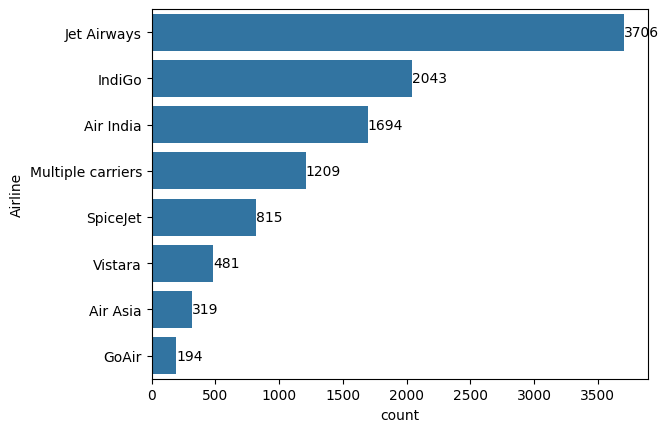

In [37]:
# Plot Airline count
ax = sns.countplot(data=df, y="Airline", color = sns.color_palette()[0], order=df['Airline'].value_counts().index)
ax.bar_label(ax.containers[0]);

#### Departure:

In [38]:
# 3rd Feature: `Source` unique values
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [39]:
# `Source` value counts
df["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

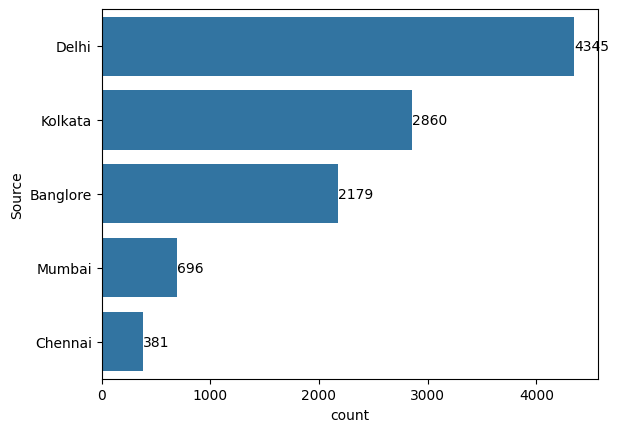

In [40]:
# Plot `Source` count
ax = sns.countplot(data=df, y="Source", color = sns.color_palette()[0], order=df['Source'].value_counts().index)
ax.bar_label(ax.containers[0]);

#### Arrival Destination:

In [41]:
# 4th Feature: `Destination` unique values
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [42]:
# `Destination` value counts
df["Destination"].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

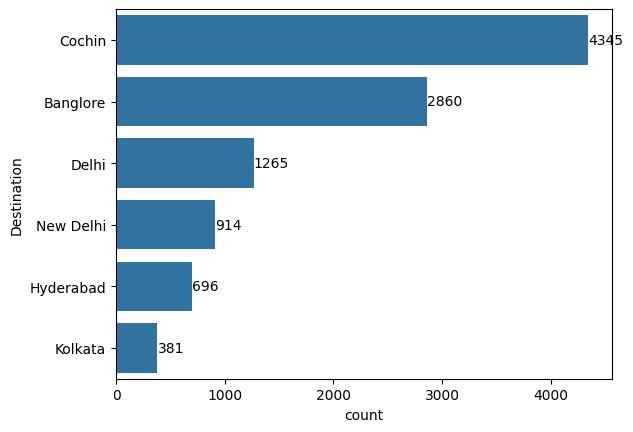

In [43]:
# Plot `Destination` count
ax = sns.countplot(data=df, y="Destination", color = sns.color_palette()[0], order=df['Destination'].value_counts().index)
ax.bar_label(ax.containers[0]);

**Airport codes:**

* **Kolkata**   : `CCU` (Netaji Subhash Chandra Bose International Airport)
* **Bangalore** : `BLR` (Bengaluru International Airport)
* **Mumbai**    : `BOM` (Chhatrapati Shivaji International Airport)
* **Chennai**   : `MAA` (Meenambarkkam International Airport)
* **Cochin**    : `COK` (Cochin International Airport)
* **Hyderabad** : `HYD` (Rajiv Gandhi International Airport)
* **Delhi**     : `DEL` (Indira Gandhi International Airport)
* **New Delhi** : `DEL` (Indira Gandhi International Airport)

With simple search it was found that both **Delhi** and **New Delhi** shares the same airport. that means it's the same.

By Double checking by intersecting `Destination` with `Route` with **Delhi** & **New Delhi**, it's clear that **Delhi** and **New Delhi** have have the same airport with code `DEL`

In [44]:
# Replace `'New Delhi` with `Delhi` as both have the same airport
df['Destination'].replace('New Delhi','Delhi', inplace = True)

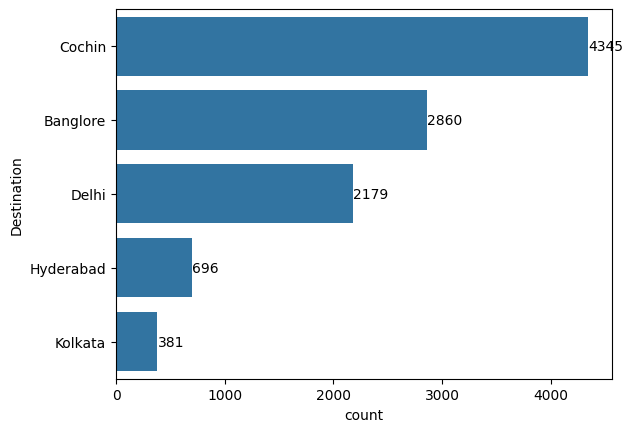

In [45]:
# Plot `Destination` count
ax = sns.countplot(data=df, y="Destination", color = sns.color_palette()[0], order=df['Destination'].value_counts().index)
ax.bar_label(ax.containers[0]);

#### Flight Route & Stops:

In [46]:
# 5th Feature: `Route` unique values
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [47]:
# `Route` value counts
df["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: Route, Length: 127, dtype: int64

In [48]:
# 9th Feature: `Total_Stops` unique values
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [49]:
# `Total_Stops` value counts
df["Total_Stops"].value_counts()

1 stop      5624
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

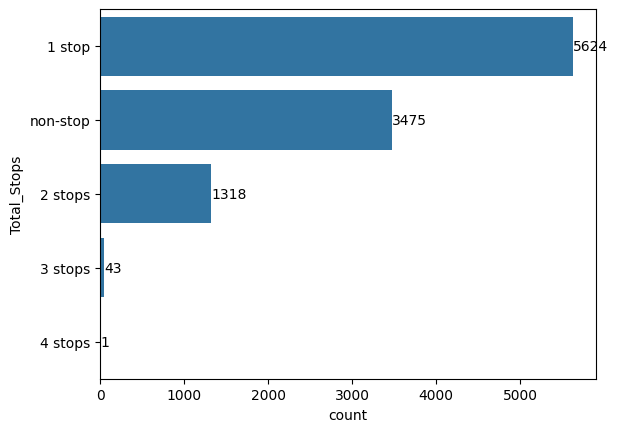

In [50]:
# Plot `Total_Stops` count
ax = sns.countplot(data=df, y="Total_Stops", color = sns.color_palette()[0], order=df['Total_Stops'].value_counts().index)
ax.bar_label(ax.containers[0]);

In [51]:
# View observations where column 'Total_Stops' has the value '4 stops'
df[df['Total_Stops'] == '4 stops']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,01/03/2019,Banglore,Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4 stops,Change airports,17686


In [52]:
# Dropping anomalies
df = df[df["Total_Stops"] != '4 stops']
#df = df[df["Total_Stops"] != '3 stops']

In [53]:
#df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [54]:
# Creating number of stops from `Route`
df["routes_count"] = df["Route"].str.count('→') - 1

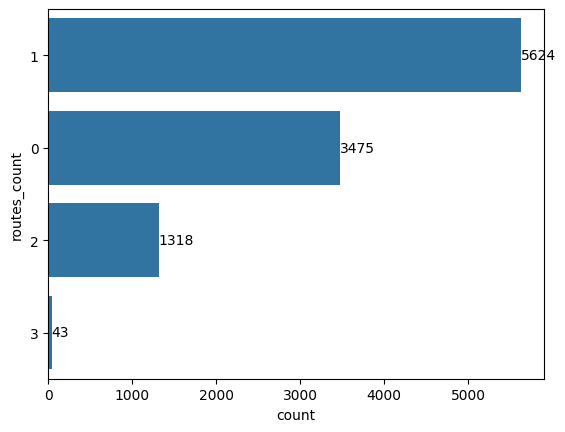

In [55]:
# Plot `routes_count` count
ax = sns.countplot(data=df, y="routes_count", color = sns.color_palette()[0], order=df['routes_count'].value_counts().index)
ax.bar_label(ax.containers[0]);

In [56]:
# Dropping anomalies
df = df[df["Airline"] != str(anomalies[0])]

In [57]:
# Verifing the total stops
#df[df["routes_count"]!=df["Total_Stops"]].shape

#### Additional Flgiht Infomation

In [58]:
# 9th Feature: `Additional_Info` unique values
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'Premium economy',
       'Business class', '1 Short layover', 'No Info', '1 Long layover',
       'Change airports', 'Red-eye flight', '2 Long layover'],
      dtype=object)

In [59]:
# `Additional_Info` value counts
df["Additional_Info"].value_counts()

No info                         8162
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Premium economy                   16
Business class                     7
Change airports                    6
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

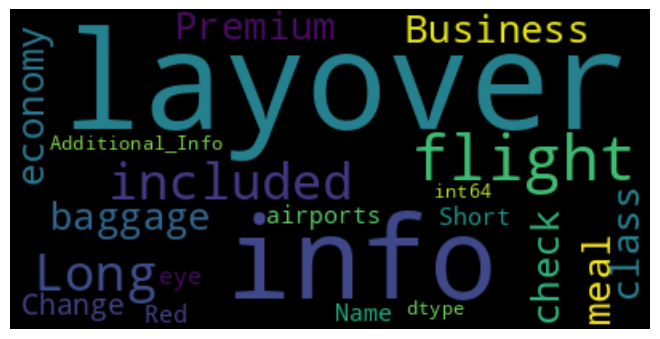

In [60]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(df.Additional_Info.value_counts()))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show();

**Feature values explaination:**

* `Red-eye flight` meaning: flights that depart at night and arrive the next morning, especially when the total flight time is insufficient for passengers to get a full night’s sleep. The term derives from red eyes as a symptom of fatigue. Red-eye flights usually take off after 9 p.m. and arrive by 5 or 6 a.m.
* `layover` is the time between two connecting flights.
* `long layover` usually lasts around four hours for domestic flights and 24 hours for international flights . 
* `short layover` is typically just a few hours and is designed to give passengers some breathing room while changing planes .

#### Flight Price:

In [61]:
# 10th Feature: `Price` statistical description 
df["Price"].describe()

count    10460.000000
mean      9026.429637
std       4624.269765
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12342.250000
max      79512.000000
Name: Price, dtype: float64

* The `mean` will be greater than the `median (50% count)`, our target is `Positively/Right skewed`.


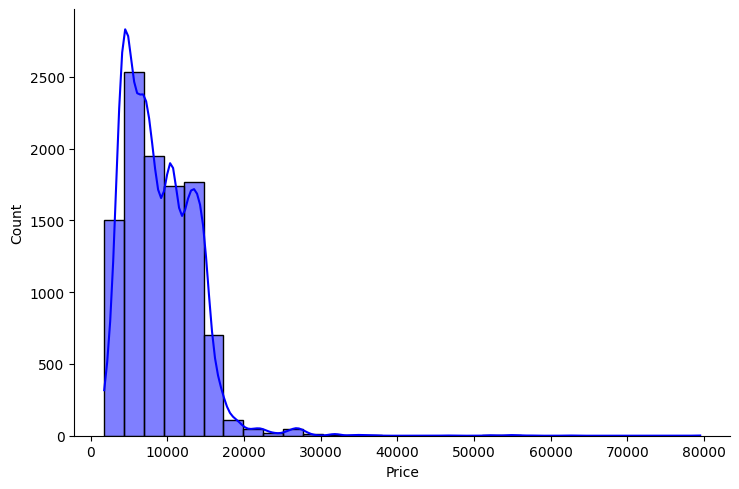

In [62]:
# 10th Feature: `Price` distribution
sns.displot(df["Price"], kde=True, bins=30, color='blue', height=5, aspect=1.5);

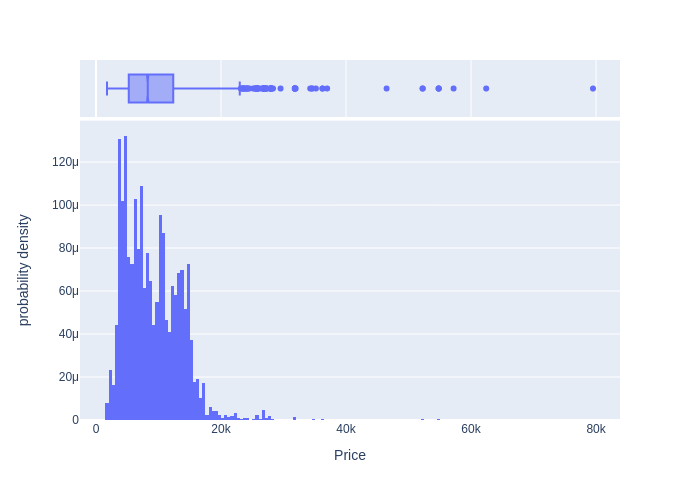

In [63]:
# Check for outliers
fig1 = px.histogram(df, x="Price", histnorm='probability density',marginal="box")
#fig.update_layout(autosize=False,width=800,height=500,)
fig1.show();
# Save images to folder
fig1.write_image("images/fig1.png", engine="kaleido")
Image('images/fig1.png')

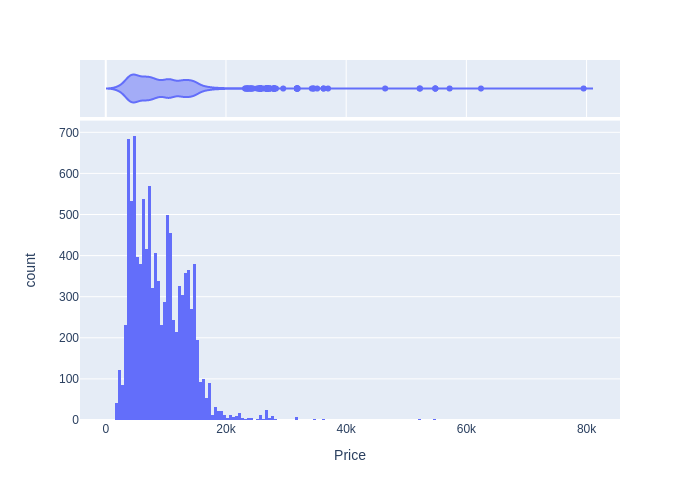

In [64]:
# Check for Price distribution 
fig2 = px.histogram(df, x="Price", marginal="violin", hover_data=df.columns)
fig2.show();
# Save images to folder
fig2.write_image("images/fig2.png", engine="kaleido")
Image('images/fig2.png')

* The `positive skewness` is clear with a tail of a distribution curve is longer on the right side. 
* This means the `outliers` of the distribution curve are further out towards the right and closer to the mean on the left.
* Skewness can affect the performance of our ML models. 
* i.e.: the model will be trained on a much larger number of values in one part of the distribution and will be less likely to successfully predict values in other parts of the distribution. 
* Skewness may also violate model assumptions or impair the interpretation of feature importance.
* transformations can help reduce skewness and make the data more normally distributed.

#### Departure Date:

In [65]:
# 2nd Feature: `Date_of_Journey` unique values
sorted(df["Date_of_Journey"].unique())

['01/03/2019',
 '03/03/2019',
 '06/03/2019',
 '09/03/2019',
 '1/03/2019',
 '1/04/2019',
 '1/05/2019',
 '1/06/2019',
 '12/03/2019',
 '12/04/2019',
 '12/05/2019',
 '12/06/2019',
 '15/03/2019',
 '15/04/2019',
 '15/05/2019',
 '15/06/2019',
 '18/03/2019',
 '18/04/2019',
 '18/05/2019',
 '18/06/2019',
 '21/03/2019',
 '21/04/2019',
 '21/05/2019',
 '21/06/2019',
 '24/03/2019',
 '24/04/2019',
 '24/05/2019',
 '24/06/2019',
 '27/03/2019',
 '27/04/2019',
 '27/05/2019',
 '27/06/2019',
 '3/03/2019',
 '3/04/2019',
 '3/05/2019',
 '3/06/2019',
 '6/03/2019',
 '6/04/2019',
 '6/05/2019',
 '6/06/2019',
 '9/03/2019',
 '9/04/2019',
 '9/05/2019',
 '9/06/2019']

In [66]:
# `Date_of_Journey` value counts
df["Date_of_Journey"].value_counts()

6/06/2019     490
18/05/2019    486
9/06/2019     485
12/06/2019    483
21/05/2019    482
9/05/2019     466
21/03/2019    412
15/05/2019    402
27/05/2019    369
27/06/2019    339
24/06/2019    330
1/06/2019     330
3/06/2019     326
15/06/2019    314
24/03/2019    314
6/03/2019     301
27/03/2019    290
24/05/2019    286
6/05/2019     281
1/05/2019     274
12/05/2019    259
1/04/2019     256
3/03/2019     217
9/03/2019     199
15/03/2019    162
18/03/2019    156
01/03/2019    150
12/03/2019    141
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    100
6/04/2019     100
06/03/2019     95
27/04/2019     94
24/04/2019     92
03/03/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [67]:
# Converting from Object to Datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")

#### Departure Time:

In [68]:
# 6th Feature: `Dep_Time` unique values
df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [69]:
# `Dep_Time` value counts
df["Dep_Time"].value_counts()

18:55    233
17:00    227
07:05    202
07:10    201
10:00    196
        ... 
22:25      1
16:25      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [70]:
# Converting from object to time format
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time#.dt.strftime('%H:%M')

In [71]:
# creating new column combining between Date_of_journey and Dep_time
df['dep_date_time'] = pd.to_datetime(df['Date_of_Journey'].astype(str) + ' ' + df['Dep_Time'].astype(str))

#### Flight Duration:

In [72]:
# 8th Feature: `Duration` unique values
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [73]:
# `Duration` value counts
df["Duration"].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
36h 25m      1
30h 25m      1
30h 15m      1
42h 5m       1
47h 40m      1
Name: Duration, Length: 367, dtype: int64

In [74]:
# Viewing anomally
df[df["Duration"]=="5m"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,routes_count,dep_date_time
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50:00,16:55,5m,2 stops,No info,17327,2,2019-03-06 16:50:00


Before dropping this anomally I have checked replacing the anomaly values `Duration`, `Arrival_Time`, `duration_hours` and `duration_minutes` with data similar fight information, but the result was creating a duplicated, therefore the best choice is to drop this anomally observation.

In [75]:
# Dropping anomally
df = df[df["Duration"] != "5m"]

In [76]:
# Create New flight duration feature
df['trip_duration'] = pd.to_timedelta(df['Duration'])  #/ pd.Timedelta(hours=1)

#### Arrival data & Time:

In [77]:
# 7th Feature: `Arrival_Time` unique values
df["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [78]:
# `Arrival_Time` value counts
df["Arrival_Time"].value_counts()

19:00           412
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:50 02 Jun      1
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

* `Arrival_Time` contain alot of missing dates and conflect between deputure date, therefore it's better to create a new `arrival_date_time column`.



#### New Feature: Arrival date and time

In [79]:
# Creating a new Date and time feature for arrival date
df['arrival_date_time'] = df['dep_date_time'] + df['trip_duration']

In [80]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,routes_count,dep_date_time,trip_duration,arrival_date_time
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,2019-03-24 22:20:00,0 days 02:50:00,2019-03-25 01:10:00
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,7h 25m,2 stops,No info,7662,2,2019-05-01 05:50:00,0 days 07:25:00,2019-05-01 13:15:00
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,2,2019-06-09 09:25:00,0 days 19:00:00,2019-06-10 04:25:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,5h 25m,1 stop,No info,6218,1,2019-05-12 18:05:00,0 days 05:25:00,2019-05-12 23:30:00
4,IndiGo,2019-03-01,Banglore,Delhi,BLR → NAG → DEL,16:50:00,21:35,4h 45m,1 stop,No info,13302,1,2019-03-01 16:50:00,0 days 04:45:00,2019-03-01 21:35:00


In [81]:
# Reset the index of the dataframe
df = df.reset_index(drop=True)

#### Save dataframe to CSV

In [82]:
# Save the dataframe to a CSV file
df.to_csv('data_train_cleaned.csv', index=False)

## Exploratory Data Analysis:

**Content:**

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis
4. Business Q & A.

## Feature Engineering

**Content:**

1. Feature Extraction
2. Feature Selection
3. Feature Transformation

Handling Categorical Data

* Nominal data (data are not in any order): `OneHotEncoder`.

* Ordinal data (data are in order): `LabelEncoder`.

In [83]:
'''
# Utilizing GPU Processors on Colab
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
'''

"\n# Utilizing GPU Processors on Colab\ndevice_name = tf.test.gpu_device_name()\nif device_name != '/device:GPU:0':\n  raise SystemError('GPU device not found')\nprint('Found GPU at: {}'.format(device_name))\n"